# TP 1 - Équation de la chaleur
## Thêta Schéma

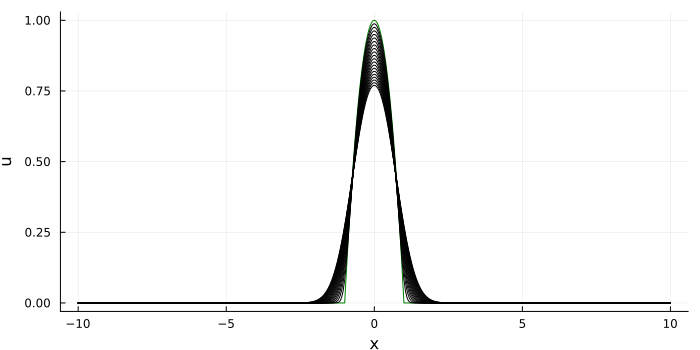

In [99]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 800                               # grid size (space)
Δx = 2*L/Nx                            # step size (space)
σ =  1                                # CFL
Δt = 0.0000001                         #σ * Δx^2                          # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
theta = 0.75


# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(theta*σ*ones(Nx), 1 .- 2*theta*σ*ones(Nx+1), theta*σ*ones(Nx))

A = Tridiagonal(-(1-theta)*σ*ones(Nx), 1 .+ 2*(1-theta)*σ*ones(Nx+1), -(1-theta)*σ*ones(Nx))


for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

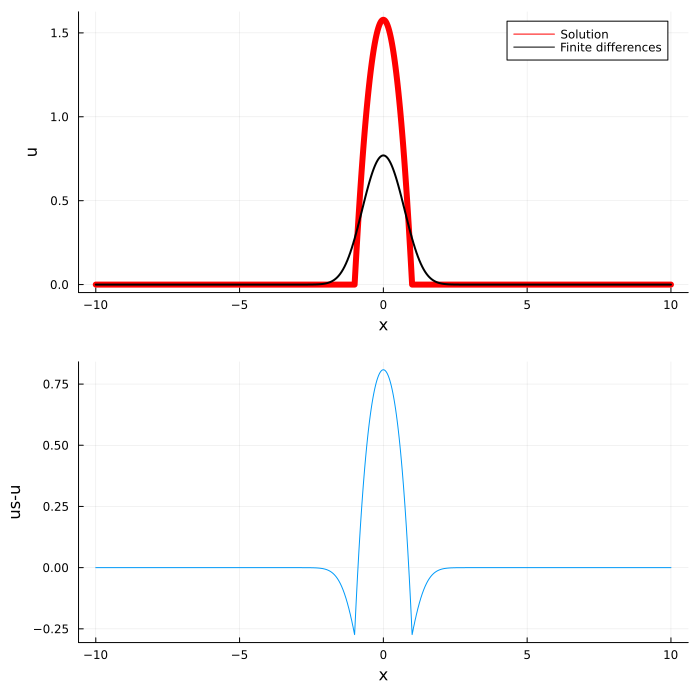

Δx: 0.025	 Δt:1.0e-7	 max error: 0.8084804464795209


In [100]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

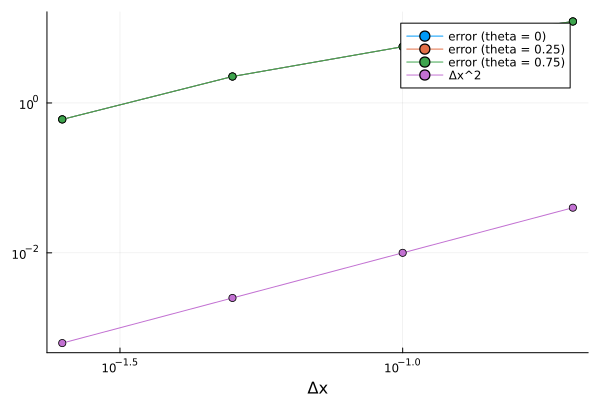

In [96]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025 ]                                                            #[ 0.2 ]
#errx = [ 12.22245197268432, 5.631858890978019, 2.253617544959731, 0.6032332453396727 ]    #[ 0.00039 ] 
#plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
#plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

errx0 = [12.22128544925785, 5.630954633009142, 2.2535747549896556, 0.6032332452687321 ] # ici, theta = 0
errx1 = [12.221870412360996, 5.631180271703329, 2.253585525695371,  0.60323324529383 ] # theta = 0.25
errx2 = [12.222161616311308, 5.6316324050216915, 2.2536069212068655, 0.6032332453285124] # theta = 0.75



plot(Δx, errx0, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error (theta = 0)")
plot!(Δx, errx1, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error (theta = 0.25)")
plot!(Δx, errx2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error (theta = 0.75)")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

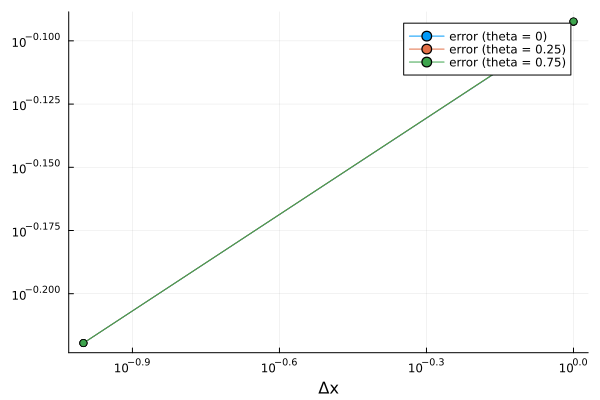

In [102]:
theta = [ 0.1, 1  ]

errx0 = [0.603233245293837, 0.8082103929862541] #theta = 0.25
errx1 = [0.6032332453134993, 0.8083450906286194] #theta = 0.5
errx2 = [0.6032332453285124, 0.8084804464795209] #theta = 0.75


plot(theta, errx0, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error (theta = 0)")
plot!(theta, errx1, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error (theta = 0.25)")
plot!(theta, errx2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error (theta = 0.75)")